# Modeling Driven Damped Oscillation Motion with Experimental Data and Computational Model

In [43]:
# Import Libraries
import pandas as pd
import math
import numpy as np
from Unit0 import model_utils
import statistics

In [44]:
# Constants
gravitational_acceleration = -9.81  # m/s^2
masses = [0.0394, 0.0415, 0.0415, 0.0415, 0.0415, 0.0415]  # kg, affects amplitude
spring_constants = [4.7, 4.7, 4.5, 4.5, 4.6, 4.5]  # N/m, affects amplitude, period and frequency
coefficient_of_air_resistance = [0.00625, 0.0135, 0.0135, 0.0135, 0.0135, 0.0135]  # N/m, affects damping speed
driving_force_amplitude = [0.3, 0.125, 0.3, 0.3, 0.15, 0.15]  # N, affects the rate of growth of the amplitude
driving_force_frequency = [1.7, 1.75, 1.55, 1.6, 1.65, 1.7]  # Hz, affects the amplitude, period, and frequency

In [45]:
# Computational Model of Driven Damped Oscillation Motion
def compute_models(index):
    # Calculate acceleration based on the spring force, the driving force, the air resistance and the force of gravity
    def compute_acceleration(t, x, v, a):
        return -spring_constants[index] * (x + masses[index] * gravitational_acceleration / spring_constants[index]) / masses[index] + driving_force_amplitude[index] * math.sin(math.tau * driving_force_frequency[index] * t) - coefficient_of_air_resistance[index] * v * abs(v) / masses[index] + gravitational_acceleration

    # Load experimental data
    data = pd.read_csv(f"Data/Data{index + 1}.csv")

    # Compute the list of time, position, velocity, and acceleration
    times = np.linspace(data["Time (s)"][0], data["Time (s)"].iat[-1], 10000)
    _, positions, velocities, accelerations = model_utils.euler_method(compute_acceleration, times=times, position_initial=0)

    # Graph the position for all experimental trials and the computational model
    experimental_data = [(data["Time (s)"], data.iloc[:, i + 1], f"Experimental Position {i + 1}") for i in range(len(data.columns) - 1)]
    experimental_data.append((times, positions, "Computational Position"))
    model_utils.graph("Position", "m", experimental_data, f"Graphs/Position{index + 1}")

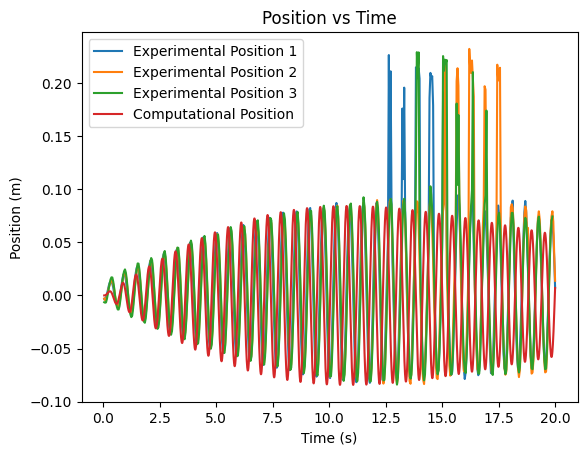

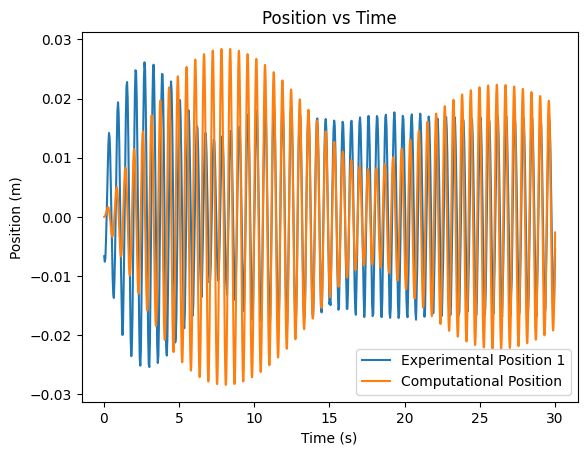

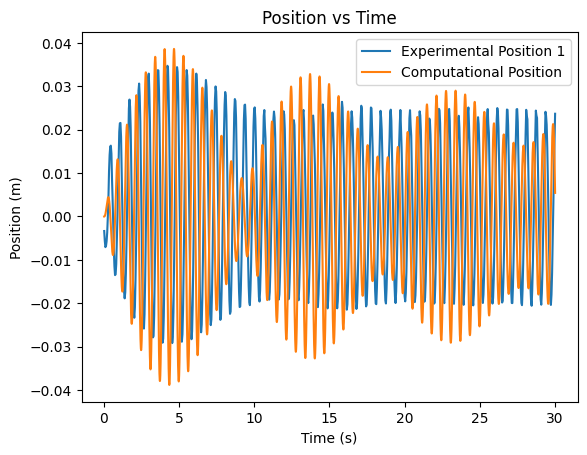

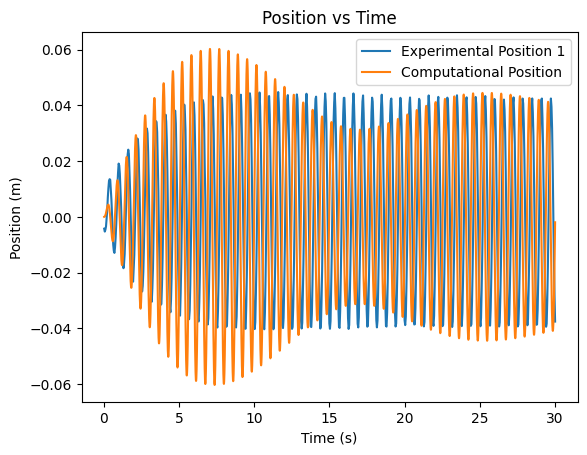

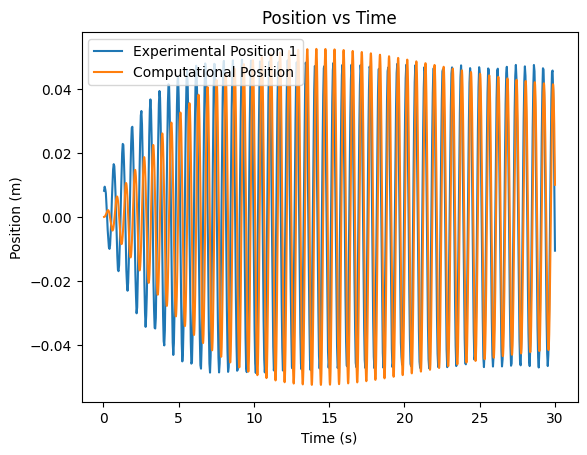

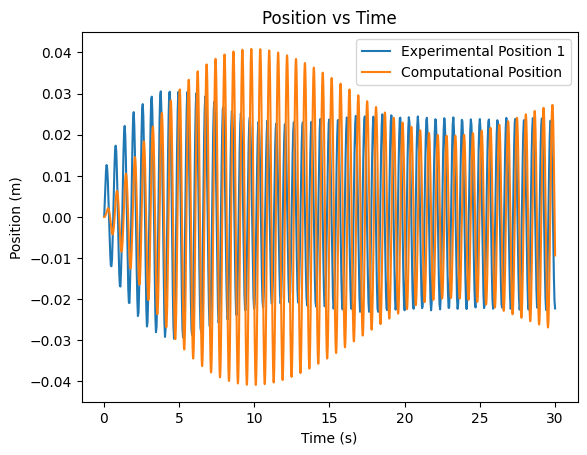

In [46]:
compute_models(0)
compute_models(1)
compute_models(2)
compute_models(3)
compute_models(4)
compute_models(5)

In [47]:
# Computational Model of Driven Damped Oscillation Motion
def computational_model_only(index):
    # Calculate acceleration based on the spring force, the driving force, the air resistance and the force of gravity
    def compute_acceleration(t, x, v, a):
        return -spring_constants[index] * (x + masses[index] * gravitational_acceleration / spring_constants[index]) / masses[index] + driving_force_amplitude[index] * math.sin(math.tau * driving_force_frequency[index] * t) - coefficient_of_air_resistance[index] * v * abs(v) / masses[index] + gravitational_acceleration

    # Compute the list of time, position, velocity, and acceleration
    times = np.linspace(0, 60, 10000)
    _, positions, velocities, accelerations = model_utils.euler_method(compute_acceleration, times=times, position_initial=0)

    # Graph the position for all experimental trials and the computational model
    model_utils.graph("Position", "m", [(times, positions, "Computational Position")], f"Graphs/Computational Position{index + 1}")

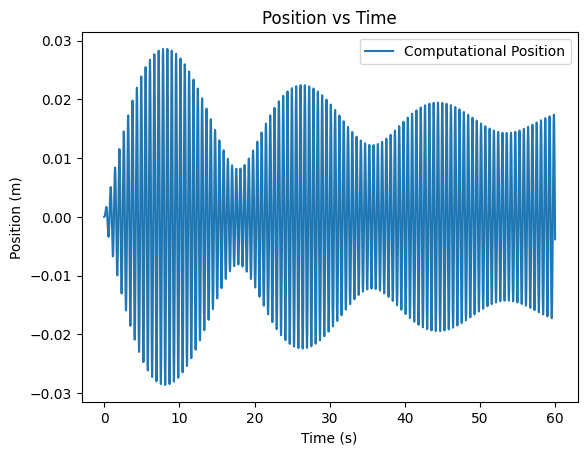

In [48]:
computational_model_only(1)